In [12]:
%matplotlib inline

<a id='ch05'></a>
# Chapter 5: Categorizing and Tagging Words
Objectives:
1. What are lexical categories, and how are they used in NLP?
2. What is a good Python data structure for storing words and their categories?
3. How can we automatically tag each word of a text with its word class?

## Sections
* [Section 5.1 Using a Tagger](#section1)
* [Section 5.2 Tagged Corpora](#section2)
* [Section 5.4 Automatic Tagging](#section4) 
* [Section 5.5 N-Gram Tagging](#section5)
* [Section 5.6 Transformation-Based Tagging](#section6)
* [Section 5.7 How to Determine the Category of a word](#section7)

<a id='section1'></a>
## 5.1 Using a Tagger
[Back](#ch05)

### Part of Speech (POS) Tagging
POS tagging is the process of marking up a word in a corpus to a corresponding part of a speech tag, based on its context and definition. This task is not straightfoward, as a particular word may have a different part of speech based on the context in which the word is used.

### The Different POS Tagging Techniques
1. **Lexical Based Methods** - Assign the POS tag the most frequently occurring with a word in the training corpus.
2. **Rule-Based Methods** - Assign POS tags based on rules. For example, we can have a rule that says, words ending with "ed" or "ing" must be assigned to a verb. Rule-Based Techniques can be used along with Lexical Based approaches to allow POS Tagging of words that are not present in the training corpus but are there in the testing data.
3. **Probabilistic Methods** - This method assigns the POS tags based on the probability of a particular tag sequence occurring. Conditional Random Fields (CRFs) and Hidden Markov Models (HMMs) are probabilistic approaches to assign a POS Tag.
4. **Deep Learning Methods** - Recurrent Neural Networks can also be used for POS tagging.

In [1]:
import nltk

In [36]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text))

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


<a id='section2'></a>
## 5.2 Tagged Corpora
[Back](#ch05)
### Representing Tagged Tokens

In [3]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

We can construct a list of tagged tokens directly from a string.

In [5]:
sent = """
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
"""
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


### A simplified Part of Speech Tagset
|Tag | Meaning | Examples |
|----|---------|----------|
|`ADJ` |adjective |new, good, high, special, big, local|
|`ADV` |adverb |really, already, still, early, now|
|`CNJ` |conjunction| and, or, but, if, while, although|
|`DET` |determiner| the, a, some, most, every, no|
|`EX` |existential| there, there’s|
|`FW` |foreign word| dolce, ersatz, esprit, quo, maitre|
|`MOD`| modal verb| will, can, would, may, must, should|
|`N` |noun| year, home, costs, time, education|
|`NP` |proper noun| Alison, Africa, April, Washington|
|`NUM`| number |twenty-four, fourth, 1991, 14:24|
|`PRO`| pronoun |he, their, her, its, my, I, us|
|`P` |preposition| on, of, at, with, by, into, under|
|`TO` |the word *to*| to|
|`UH` |interjection| ah, bang, ha, whee, hmpf, oops|
|`V` |verb| is, has, get, do, make, see, run|
|`VD` |past tense| said, took, told, made, asked|
|`VG` |present participle| making, going, playing, working|
|`VN` |past participle |given, taken, begun, sung|
|`WH`| *wh* determiner| who, which, when, what, where, how|

The latest version of `nltk` requires mapping to the *universal tagset* (https://github.com/slavpetrov/universal-pos-tags)

In [9]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

In [35]:
print({k: v for k, v in sorted(tag_fd.items(), key=lambda item: item[1], reverse=True)})

{'NOUN': 30654, 'VERB': 14399, 'ADP': 12355, '.': 11928, 'DET': 11389, 'ADJ': 6706, 'ADV': 3349, 'CONJ': 2717, 'PRON': 2535, 'PRT': 2264, 'NUM': 2166, 'X': 92}


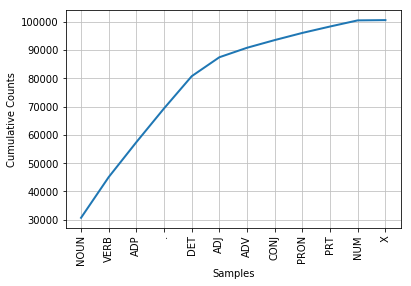

In [14]:
tag_fd.plot(cumulative=True);

### Nouns
Let's inspect some tag ged text to see what parts-of-speech occurs before a noun. We construct a list of bigrams whose members are themselves word-tag pairs. Then we construct a `FreqDist` from the tag parts of the bigrams.

In [34]:
word_tag_pairs = list(nltk.bigrams(brown_news_tagged))
print(list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN')))

['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', 'CONJ', '.', 'NUM', 'ADV', 'PRT', 'X', 'PRON']


### Verbs
Find the most common verbs in news text?

In [45]:
wsj = nltk.corpus.treebank.tagged_words()

In [46]:
word_tag_fd = nltk.FreqDist(wsj)

In [47]:
print([word + "/" + tag for (word, tag) in word_tag_fd if tag.startswith('V')][:20])

['join/VB', 'is/VBZ', 'publishing/VBG', 'was/VBD', 'named/VBN', 'used/VBN', 'make/VB', 'has/VBZ', 'caused/VBN', 'exposed/VBN', 'reported/VBD', 'enters/VBZ', 'causing/VBG', 'show/VBP', 'said/VBD', 'makes/VBZ', 'stopped/VBD', 'using/VBG', 'were/VBD', 'reported/VBN']


Since words and tags are paired, we can treat the word as a condition and the tag as an event, and initialize a conditional frequency distribution with a list of condition-event pairs.

In [48]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].keys()

dict_keys(['NN', 'VB'])

In [49]:
cfd1['cut'].keys()

dict_keys(['VBD', 'VB', 'VBN', 'NN'])

We can reverse the orders of the pairs so the tags are the conditions and the words are the events. Now we can see likely words for a given tag:

In [51]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN'].keys())[:20])

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought']


To clarify the distinction between `VBN` (past tense) and `VN` (past participle), let's find words that can be both `VD` and `VN` and see some surrounding text:

In [54]:
print([w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]][:20])

['named', 'used', 'caused', 'reported', 'said', 'stopped', 'heard', 'studied', 'led', 'replaced', 'sold', 'worked', 'died', 'found', 'rejected', 'imposed', 'made', 'dumped', 'imported', 'mixed']


In [56]:
idx1 = wsj.index(('kicked', 'VBD'))
print(wsj[idx1-4:idx1+1])

[('While', 'IN'), ('program', 'NN'), ('trades', 'NNS'), ('swiftly', 'RB'), ('kicked', 'VBD')]


In [57]:
idx2 = wsj.index(('kicked', 'VBN'))
print(wsj[idx2-4:idx2+1])

[('head', 'NN'), ('of', 'IN'), ('state', 'NN'), ('has', 'VBZ'), ('kicked', 'VBN')]


### Unsimplified Tags
Find the most frequent nouns of each noun part-of-speech type.

|`$`| possessive nouns|
|---|-----------------|
|`S`| plural nouns |
|`P`| proper nouns |
| `-NC`| citations |
|`-HL` | headlines |
|`-TL` | titles |

In [60]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, list(cfd[tag].keys())[:5]) for tag in cfd.conditions())

In [61]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN ['investigation', 'primary', 'election', 'evidence', 'place']
NN$ ["ordinary's", "court's", "mayor's", "wife's", "governor's"]
NN$-HL ["Golf's", "Navy's"]
NN$-TL ["Department's", "Commissioner's", "President's", "Party's", "Mayor's"]
NN-HL ['Merger', 'jail', 'Construction', 'fund', 'sp.']
NN-NC ['ova', 'eva', 'aya']
NN-TL ['County', 'Jury', 'City', 'Committee', 'Court']
NN-TL-HL ['Mayor', 'Commissioner', 'City', 'Oak', 'Grove']
NNS ['irregularities', 'presentments', 'thanks', 'reports', 'voters']
NNS$ ["taxpayers'", "children's", "members'", "women's", "years'"]
NNS$-HL ["Dealers'", "Idols'"]
NNS$-TL ["States'", "Women's", "Princes'", "Bombers'", "Falcons'"]
NNS-HL ['Wards', 'deputies', 'bonds', 'aspects', 'Decisions']
NNS-TL ['Police', 'Roads', 'Legislatures', 'Bankers', 'Reps.']
NNS-TL-HL ['Nations']


Search for three-word phrases using POS tags

In [62]:
from nltk.corpus import brown
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [65]:
for i, tagged_sent in enumerate(brown.tagged_sents()):
    if i < 50: process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait


Look at words that are highly ambiguous as to their part-of-speech tag. Understanding why such words are tagged as they are in each context can help us clarify the distinction between the tags.

In [66]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)

In [70]:
for word in data.conditions():
    if len(data[word]) >3:
        tags = data[word].keys()
        print(word, ' '.join(tags))

that ADP PRON DET ADV
best ADJ ADV VERB NOUN
present ADJ ADV NOUN VERB
close NOUN ADJ ADV VERB
open ADJ ADV VERB NOUN


#### Highly ambiguous words: spaCy

In [72]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [74]:
doc = nlp('considerately leaving it open for the neighbours')

In this instance, `nltk` considered `open` to be a verb, but spaCy considered it to be an adjective.

In [75]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

considerately considerately ADV RB advmod xxxx True False
leaving leave VERB VBG ROOT xxxx True False
it -PRON- PRON PRP dobj xx True True
open open ADJ JJ oprd xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
neighbours neighbour NOUN NNS pobj xxxx True False


<a id='section4'></a>
## 5.4 Automatic Tagging
[Back](#ch04)
### The Default Tagger
The simplest possible tagger assigns the same tag to each token. Although it seems banal, it establishes an important baseline for tagger performance.

In [76]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

Now we can create a tagger that tags everything as `NN`

In [78]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]


In [80]:
default_tagger.evaluate(brown.tagged_sents())

0.13130472824476916

### The Regular Expression Tagger
The regular expression tagger assigns tags to tokens on the basis of matching patterns. We can express our opinions on the part-of-speech of a word using regular expressions.

In [81]:
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),   # simple past
    (r'.*es$', 'VGZ'),   # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),    # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), #cardinal numbers
    (r'.*', 'NN')        # nouns, default
]

In [82]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [84]:
print(regexp_tagger.tag(brown.sents()[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [86]:
regexp_tagger.evaluate(brown.tagged_sents())

0.1927484860384846

### The Lookup Tagger
A lot of high-frequency words do no have the NN tag. Let's find the hundred most frequent words and store their most likely tag. We can then use this information as they model for a 'lookup tagger' (an NLTK `UnigramTagger`):

In [88]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)

baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown.tagged_sents())

0.3365266036968908

In [90]:
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent))

[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('relative', 'JJ'), ('handful', 'NN'), ('of', 'IN'), ('such', 'JJ'), ('reports', 'NNS'), ('was', 'BEDZ'), ('received', 'VBD'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'IN'), ('the', 'AT'), ('widespread', 'JJ'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NNS'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]


Many words have been assigned a tag of `None`, because they were not among the 100 most frequent words. In these cases we would like to assign the default tag of `NN`. In other words, we want to use the lookup table first, and if it is unable to assign a tag, then use the default tagger, a process known as **backoff**. We do this by specifying one tagger as a parameter to the other. Now the lookup tagger will only store word-tag pairs for words other than nouns, and whenever it cannot assign a tag to a word, it will invoke the default tagger.

In [91]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [94]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

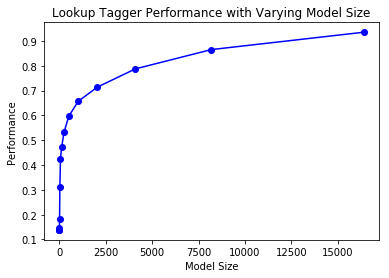

In [95]:
display()

<a id='section5'></a>
## 5.5 N-Gram Tagging
[Back](#ch05)
### Unigram Tagging
Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag `JJ` to any occurrence of the word *frequent* since *frequent* is used as an adjective more often than it is used as a verb. A unigram tagger behaves just like a lookup tagger, except there is a more convenient technique for setting it up, called **training**. 

In [97]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
print(unigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [98]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

We **train** a `UnigramTagger` by specifying tagged sentence data as a parameter when we initialize the tagger. The training process involves inspecting the tag of each word and storing the most likely tag for any word in a dictionary that is stored inside the tagger.

### Separating the Training and Testing Data
Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the previous example. A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect score, but would be useless for tagging new text. Instead, we should split the data, training on 90% and testing on the remaining 10%:

In [99]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [100]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

### General N-Gram Tagging
When we perform a language processing task based on unigrams, we are using one item of context. In the case of tagging, we consider only the current token, in isolation from any larger context. Given such a model, the best we can do is tag each word with its *a priori* most likely tag. The means we would tag a word such as *wind* with the same tag, regardless of whether it appears in the context *the wind* or *to wind*.

An **n-gram tagger** is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the *n*-1 preceding tokens. The tag to be chosen, $t_n$, is circled, and the context is shaded in grey. In the example of an n-gram tagger show below, we have $n=3$; that is we consider the tags of the two preceding words in addition ot the current word. An n-gram tagger picks the tag that is most likely in the given context.

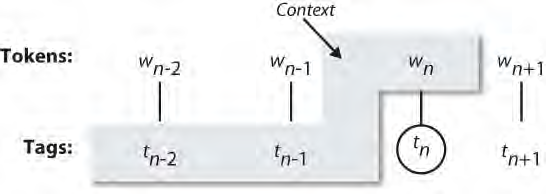

The `NgramTagger` class uses a tagged training corpus to determine which part-of-speech tag is most likely for each context. 

In [102]:
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [103]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [104]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

As $n$ gets larger, the specificity of the contexts increases, as does the chance that the data we wish to tag contains contexts that were not present in the training data. This is known as the *sparse data* problem, and is quite pervasive in NLP. As a consequence, there is a trade-off between the accuracy and the coverage of our results (and this is related to the **precision/recall tradeoff** in information retrieval.

### Combining Taggers
One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessay. For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:
1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
3. If the unigram tagger is also unable to find a tag, use a default tagger.

In [106]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t2.evaluate(test_sents)

0.8452108043456593

### Tagging Unknown Words
Our approach to tagging unknown words still uses backoff to a regular expression tagger or a default tagger. These are unable to make use of context. Thus, if our tagger encountered the word *blog*, not seen during training, it would assign it the same tag, regardless of whether this word appeared in the context *the blog* or *to blog*. How can we do better with these unknown words, or **out-of-vocabulary** items?

A useful method to tag unknown words based on context is to limit the vocabulary of a tagger to the most frequent $n$ words, and to replace every other word with a special word *UNK* using the method shown. During training, a unigram tagger will probably learn that *UNK* is usually a noun. However the n-gram taggers will detect contexts in which it has some other tag. For example, if the preceding word is *to* (tagged `TO`), then *UNK* will probably tagged as a verb.

### Storing Taggers
Training a tagger on a large corpus may take a significant time. Instead of training a tagger every time we need one, it is convenient to save a trained tagger in a file for later reuse.

In [109]:
import pickle
with open('t2.pkl', 'wb') as f:
    pickle.dump(t2, f, -1)

In [110]:
with open('t2.pkl', 'rb') as f:
    tagger = pickle.load(f)

In [111]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulary laws."""

In [113]:
tokens = text.split()
print(tagger.tag(tokens))

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', 'NN'), ('of', 'IN'), ('regulary', 'NN'), ('laws.', 'NN')]


### Performance Limitations

In [115]:
cfd = nltk.ConditionalFreqDist(
((x[1], y[1], z[0]), z[1]) for sent in brown_tagged_sents for x, y, z in nltk.trigrams(sent))

In [116]:
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c])>1]

In [117]:
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

#### Confusion Matrix

In [121]:
test_tags = [tag for sent in brown.sents(categories='editorial') for (word, tag) in t2.tag(sent)]

gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
nltk.ConfusionMatrix(gold_tags, test_tags)

<ConfusionMatrix: 52073/61604 correct>

### Tagging Across Sentence Boundaries
An n-gram tagger uses recent tags to guide the choice of tag for the current word. When tagging the first word of a sentence, a trigram tagger will be using the part-of-speech tag of the previous two tokens, which will normally be the last word of the previous sentence and the sentence-ending punctuation. However, the lexcial category that closed the previous sentence has no bearing on the one that begins the next sentence.

To deal with this, we can train, run and evaluate taggers using lists of tagged sentences.

In [122]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

t2.evaluate(test_sents)

0.8452108043456593